In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Problem 1

In [2]:
def getExpectedValue(environments, state, action, shuttle_capacity, V_prime, reward, discount):
    value = 0
    for env in environments:
        # subtract the capacity of the shuttle if action indicator is 1
        s_prime = min(max(state + env - action * shuttle_capacity, 0), 200)
        # calculate the expectation given the uniform distribution of five possibilities
        value += 1/len(environments) * V_prime[s_prime]
    # expected total value given the state and the action
    return reward + discount * value

In [3]:
def getReward(c_f, c_h, a, s, K):
    return a * c_f + max(s - a * K, 0) * c_h

## A)

In [4]:
def enumeration(T, S, A, E, K, c_f, c_h, d, V_t1, V_t):
    for t in range(T, -1, -1):
        for s in S:
            expectedValues = []
            for a in A:
                # calculate the reward based on the action and state
                reward = getReward(c_f, c_h, a, s, K)
                expectedValues.append(getExpectedValue(E, s, a, K, V_t1, reward, d))
            V_t[s] = max(expectedValues)
        V_t1 = V_t.copy()
    plt.plot(V_t1)
    return plt.show()

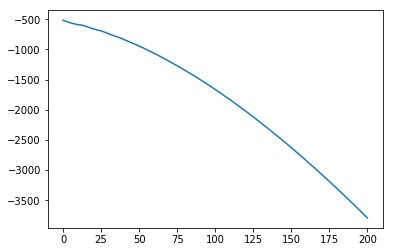

0.8848249912261963

In [5]:
T = 500
S = list(range(0, 201))
A = [0, 1]
E = list(range(1, 6))
K = 15
c_f = -100
c_h = -2
d = 0.95
V_t1 = [0] * 201
V_t = [0] * 201
start = time.time()
enumeration(T, S, A, E, K, c_f, c_h, d, V_t1, V_t)
end = time.time()
end - start

## B)

In [6]:
def valueIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k):
    while delta > theta:
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K)
                expectedValues.append(getExpectedValue(E, s, a, K, V_k, reward, d))
            V_k1[s] = max(expectedValues)
        delta = max(np.abs(np.array(V_k1) - np.array(V_k)))
        # update V_k to be the expected total values for V_k1 as we iterate forward through k
        V_k = V_k1.copy()
    plt.plot(V_k)
    return plt.show()

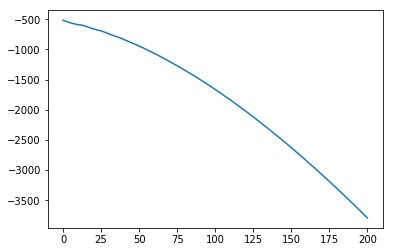

0.5643131732940674

In [7]:
theta = 10e-6
delta = 2
V_k1 = [0] * 201
V_k = [0] * 201
start = time.time()
valueIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k)
end = time.time()
end - start

## C)

In [11]:
def policyIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy):
    changing = True
    while changing:
        # Policy evaluation
        while delta > theta:
            for s in S:
                # Get the action based on the policy
                a = oldPolicy[s]
                reward = getReward(c_f, c_h, a, s, K)
                V_k1[s] = getExpectedValue(E, s, a, K, V_k, reward, d)
            delta = max(np.abs(np.array(V_k1) - np.array(V_k)))
            V_k = V_k1.copy()
        # Policy improvement
        for s in S:
            expectedValues = []
            for a in A:
                reward = getReward(c_f, c_h, a, s, K)
                expectedValues.append(getExpectedValue(E, s, a, K, V_k, reward, d))
            bestAction = np.argmax(expectedValues)
            newPolicy[s] = bestAction
        if newPolicy != oldPolicy:
            oldPolicy = newPolicy.copy()
            delta = 2
            V_k1 = [0] * 201
            V_k = [0] * 201
        else:
            changing = False
    plt.plot(newPolicy)
    plt.show()
    return newPolicy

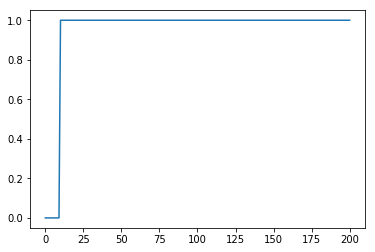

4.21132755279541

In [12]:
V_k1 = [0] * 201
V_k = [0] * 201
oldPolicy = [random.randint(0,1)] * 201
newPolicy = [random.randint(0,1)] * 201
start = time.time()
policy = policyIteration(theta, delta, S, A, E, K, c_f, c_h, d, V_k1, V_k, oldPolicy, newPolicy)
end = time.time()
end - start

In [13]:
policy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]